# The NN Module

`nn.Module` is the fundamental base class for all neural network modules in PyTorch. Think of it as the building block for every part of your neural network, from a single layer (like Linear or Convolutional) to the entire, complex model itself (like a Transformer or a ResNet).

Your models are `nn.Module`: Any class you create for your neural network should inherit from `nn.Module`.

PyTorch's layers are `nn.Module`: Built-in layers like `nn.Linear`, `nn.Conv2d`, `nn.ReLU` are all subclasses of `nn.Module`.



# Our Neural Network Structure


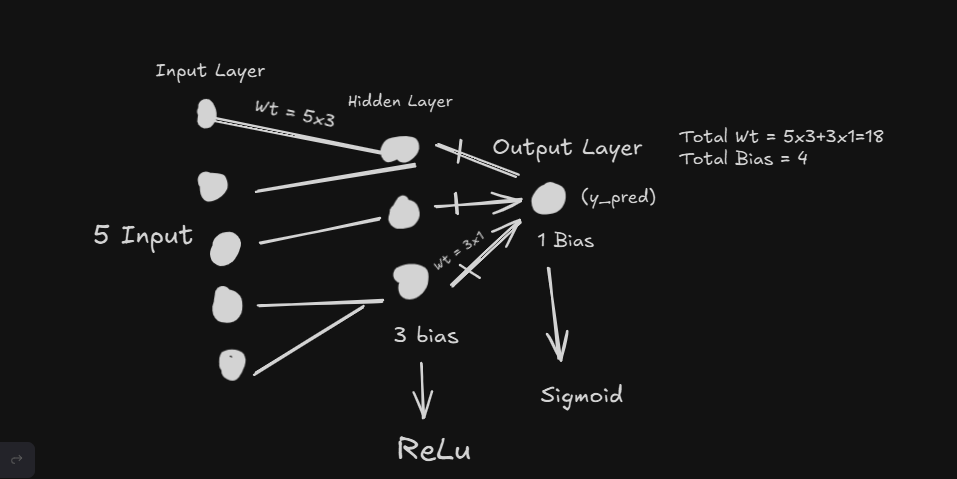


In [15]:
# Create Model Class
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()  # Initialize parent nn.Module (required for parameter tracking)

        # Define linear layer: input_size -> output_size
        # Learns weights and bias automatically
        self.linear1 = nn.Linear(num_features, 3)  # num_features (input), (3 output)
        self.relu = nn.ReLU() # ReLu Activation Function at Hidden Layer
        self.linear2 = nn.Linear(3, 1) # 3 Input, 1 Output of Hiddel Layer
        self.sigmoid = nn.Sigmoid() # Sigmoid Activation Function for Output Layer

    def forward(self, features):
      out = self.linear1(features)
      out = self.relu(out)
      out = self.linear2(out)
      out = self.sigmoid(out)

      return out


In [16]:
# Creating Simple Dataset
features = torch.rand(10, 5)  # 10 samples, 5 features each

# Create Model - pass input dimension (5 features)
model = Model(features.shape[1])  # features.shape[1] = 5

# Call Model for Forward Pass
# This automatically calls the forward() method
# Input: (10, 5) -> Output: (10, 1)
model(features)

tensor([[0.5200],
        [0.5311],
        [0.5164],
        [0.5149],
        [0.5343],
        [0.5326],
        [0.5047],
        [0.5245],
        [0.5028],
        [0.5168]], grad_fn=<SigmoidBackward0>)

In [17]:
# See Linear1 Weights (Should Show 15 weights)
model.linear1.weight

Parameter containing:
tensor([[ 0.0542,  0.2517, -0.1159,  0.2470, -0.3564],
        [ 0.3050, -0.3461,  0.1353, -0.3624,  0.2189],
        [-0.2444, -0.1234, -0.1262,  0.0710, -0.4429]], requires_grad=True)

In [18]:
# See Linear2 Weights (Should Show 3 weights)
model.linear2.weight

Parameter containing:
tensor([[ 0.2173, -0.2821,  0.0273]], requires_grad=True)

In [11]:
!pip install torchinfo

In [19]:
from torchinfo import summary
summary(model, input_size=(10, 5)) # We can see it shows 18 weight and 4 Bias

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00